# Exponential Smoothing

<Strong><a href="http://datagyani.in/index.php/2021/09/01/analyze-time-series-data/">HOW TO ANALYZE TIME SERIES DATA…</a></Strong>

In [1]:
#let's import all the neccessary libraries
import pandas as pd # data processing
import os #helps changing directory and locating your file
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as SES
span = 12
alpha = 2/(span+1)
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
import warnings
warnings.filterwarnings("ignore")

In [2]:
#changing directory
os.chdir('D:\\blog/Time Series')
os.getcwd()

'D:\\blog\\Time Series'

In [3]:
#reading the dataset
airline = pd.read_csv('airline.csv',index_col='Month',parse_dates=True)
#dropping NA if any in the dataset
airline.dropna(inplace=True)
#printing the  the first five column
airline.head()

,Passengers(in thousands)
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Please Note that DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). We are using "MS" here because our observations occur at the start of each month

In [4]:
airline.index.freq = 'MS'
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

Simple Exponential Smoothing

In [5]:
airline['SES']=SES(airline['Passengers(in thousands)']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
airline.head()

,Passengers(in thousands),SES
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


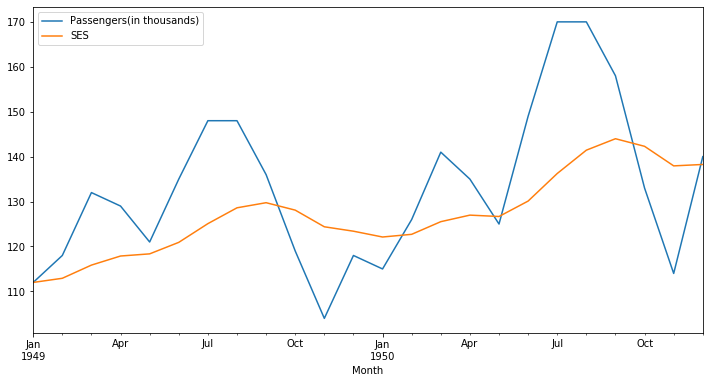

In [6]:
airline[['Passengers(in thousands)','SES']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

Double Exponential Smoothing

In [7]:
airline['Holt'] = ES(airline['Passengers(in thousands)'], trend='mul').fit().fittedvalues.shift(-1)
airline.head()

,Passengers(in thousands),SES,Holt
Month,,,
1949-01-01,112,112.000000,112.049247
1949-02-01,118,112.923077,118.051885
1949-03-01,132,115.857988,132.058041
1949-04-01,129,117.879836,129.056722
1949-05-01,121,118.359861,121.053204


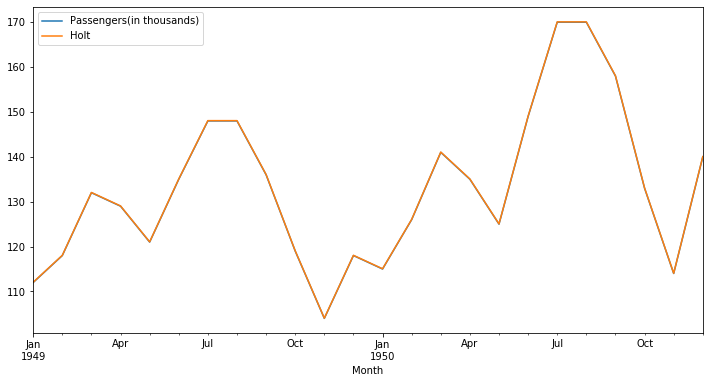

In [8]:
airline[['Passengers(in thousands)','Holt']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

Triple Exponential Smoothing

In [9]:
airline['Holt-Winter'] = ES(airline['Passengers(in thousands)'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
airline.head()

,Passengers(in thousands),SES,Holt,Holt-Winter
Month,,,,
1949-01-01,112,112.000000,112.049247,111.608110
1949-02-01,118,112.923077,118.051885,118.853687
1949-03-01,132,115.857988,132.058041,133.343675
1949-04-01,129,117.879836,129.056722,127.912641
1949-05-01,121,118.359861,121.053204,120.991626


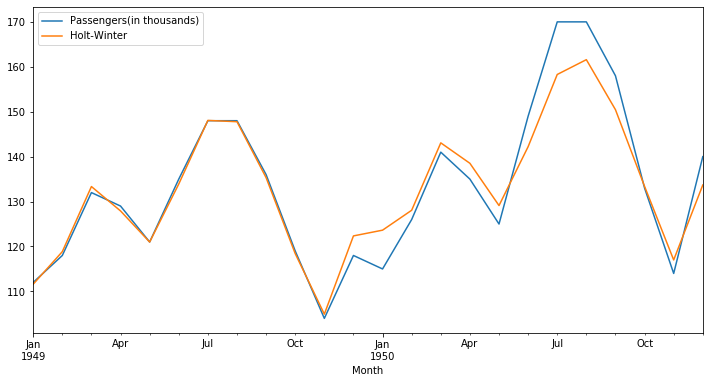

In [10]:
airline[['Passengers(in thousands)','Holt-Winter']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

I have used multiplicative models in the above example because of the exponential nature of data. I encourage you to replace "mul" with "add" and check what happens.